---
title: "ESG Reporting and Financial Analysis"
author: "Jack Katz"
date: "2024-05-17"


---

# ESG Ratings and Corporate Performance


Environmental, social, and governance (ESG) ratings are a way to track firm performance in ways other than profit and earnings. These metrics seek to see the impacts that firms have on the environment, how they adress social issues, and how they operate internally. ESG ratings are beneficial because it allows people to choose which firms to interact with and invest in based on values. This can be a mechanism to guide firms toward values that allign with the public. On the other hand, ESG ratings can be subjective and difficult to quantify. Further, it should be the governments job to regulate firms, not citizens.

In this research I look at data about firm earnings and stock performance along side ESG ratings for each firm. My goal is to answer two questions; which sectors have the highest and lowest ESG ratings? And What is the relationship between stock volatility, earnings and ESG ratings?


### Loading Libraries

In [65]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt





## Loading in data sets

### ESG Ratings

In [66]:
csv_file1 = "https://raw.githubusercontent.com/JackatzEcon/JackatzEcon.github.io/master/esg_ratings.csv"
df1 = pd.read_csv(csv_file1, engine = 'python')

df1


,Total ESG Risk Score,Environmental Risk Score,Social Risk Score,Governance Risk Score,Controversy Score
0,13.6,1.1,6.4,6.1,2.0
1,24.0,13.8,5.9,4.3,3.0
2,26.4,9.9,11.6,4.8,2.0
3,11.5,0.1,8.3,3.1,2.0
4,17.2,0.5,7.4,9.4,3.0
...,...,...,...,...,...
630,18.1,4.3,8.7,5.2,1.0
631,20.1,4.5,11.4,4.1,2.0
632,22.2,1.2,11.5,9.5,2.0
633,26.0,3.6,14.5,7.9,2.0


### Quarterly Income Statements

In [67]:
csv_file2 = 'https://raw.githubusercontent.com/JackatzEcon/JackatzEcon.github.io/master/yfinance-income-stmt.csv'
df2 = pd.read_csv(csv_file2, engine = 'python')

df2

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Salaries And Wages,Total Other Finance Cost,Other Taxes,Provision For Doubtful Accounts,Depreciation Income Statement,Insurance And Claims,Rent And Landing Fees,Excise Taxes,Depletion Income Statement,Securities Amortization
0,0.000000e+00,0.136000,487000000.0,348000000.0,62000000.0,7.500000e+08,4.870000e+08,425000000.0,-4000000.0,22000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000e+00,0.210000,504000000.0,475000000.0,62000000.0,7.730000e+08,5.040000e+08,442000000.0,-5000000.0,22000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000e+00,0.159000,227000000.0,111000000.0,71000000.0,1.014000e+09,2.270000e+08,156000000.0,-11000000.0,24000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000e+00,0.199000,472000000.0,302000000.0,71000000.0,7.930000e+08,4.720000e+08,401000000.0,-12000000.0,24000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.340308e+07,0.055385,105000000.0,-252000000.0,161000000.0,2.404000e+09,-1.370000e+08,-298000000.0,-27000000.0,27000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,-4.554000e+06,0.198000,954000000.0,599000000.0,126000000.0,5.540000e+08,9.310000e+08,805000000.0,-26000000.0,58000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3100,-6.252308e+06,0.195385,867000000.0,525000000.0,126000000.0,6.390000e+08,8.350000e+08,709000000.0,-33000000.0,59000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101,-7.098000e+06,0.169000,942000000.0,596000000.0,124000000.0,5.520000e+08,9.000000e+08,776000000.0,-36000000.0,59000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,1.624000e+07,0.232000,981000000.0,671000000.0,121000000.0,5.230000e+08,1.051000e+09,930000000.0,-35000000.0,58000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quarterly Balance Statement

In [68]:
csv_file3 = 'https://raw.githubusercontent.com/JackatzEcon/JackatzEcon.github.io/master/yfinance-balance-sheet.csv'
df3 = pd.read_csv(csv_file3, engine = 'python')

df3

,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,Total Capitalization,...,Trading Securities,Investmentsin Subsidiariesat Cost,Total Partnership Capital,Limited Partnership Capital,Dueto Related Parties Non Current,Duefrom Related Parties Non Current,Fixed Assets Revaluation Reserve,Current Deferred Taxes Liabilities,Current Deferred Taxes Assets,General Partnership Capital
0,293041817.0,293041817.0,8.070000e+08,2.555000e+09,1.778000e+09,8.743000e+09,2.721000e+09,1.778000e+09,6.188000e+09,8.743000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,292123241.0,292123241.0,1.145000e+09,2.735000e+09,1.410000e+09,8.580000e+09,2.583000e+09,1.410000e+09,5.845000e+09,8.580000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,292747000.0,292747000.0,1.460000e+09,2.789000e+09,1.072000e+09,8.347000e+09,2.270000e+09,1.072000e+09,5.558000e+09,8.292000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,295000000.0,295000000.0,1.558000e+09,2.733000e+09,9.800000e+08,8.514000e+09,2.283000e+09,9.800000e+08,5.781000e+09,8.514000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,178472464.0,178472464.0,1.190000e+09,2.548000e+09,3.812000e+09,6.542000e+09,1.840000e+09,3.812000e+09,3.994000e+09,6.463000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,456947205.0,501891243.0,4.613000e+09,6.770000e+09,1.004000e+09,1.164400e+10,4.450000e+09,1.004000e+09,5.058000e+09,1.162000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,458367358.0,501891243.0,4.528000e+09,6.755000e+09,9.000000e+08,1.156400e+10,4.454000e+09,9.000000e+08,4.997000e+09,1.156100e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,459524713.0,501891243.0,4.803000e+09,6.745000e+09,9.180000e+08,1.163200e+10,4.614000e+09,9.180000e+08,5.078000e+09,1.163000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093,460750652.0,501891243.0,4.843000e+09,6.745000e+09,6.590000e+08,1.118200e+10,4.414000e+09,6.590000e+08,4.625000e+09,1.118000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Historical Stock Data

In [70]:
csv_file4 = 'https://raw.githubusercontent.com/JackatzEcon/JackatzEcon.github.io/master/yfinance-history.csv'
df4 = pd.read_csv(csv_file4, engine = 'python')

df4

,Date,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2023-01-03,A,148.716095,0.0,151.778841,147.159956,150.619167,0.0,1414300
1,2023-01-03,AA,43.895847,0.0,45.953769,43.757993,45.067583,0.0,2880000
2,2023-01-03,AAL,12.740000,0.0,13.000000,12.530000,12.910000,0.0,21865100
3,2023-01-03,AAP,147.327988,0.0,147.444662,141.941977,142.097533,0.0,1307400
4,2023-01-03,AAPL,124.048050,0.0,129.830407,123.155402,129.215478,0.0,112117500
...,...,...,...,...,...,...,...,...,...
197791,2024-03-28,XYL,129.240005,0.0,130.220001,129.149994,129.559998,0.0,953200
197792,2024-03-28,YUM,138.649994,0.0,138.830002,137.389999,137.389999,0.0,1770900
197793,2024-03-28,Z,48.779999,0.0,50.730000,48.700001,50.169998,0.0,4895700
197794,2024-03-28,ZBH,131.979996,0.0,133.899994,131.600006,132.929993,0.0,1425300


### esg_proj dataset

In [71]:
esg_proj = pd.read_csv("https://bcdanl.github.io/data/esg_proj.csv")
esg_proj

,Symbol,Company Name,Sector,Industry,Country,Market Cap
0,A,"Agilent Technologies, Inc.",Industrials,Diagnostics & Research,United States,4.036543e+10
1,AA,Alcoa Corporation,Industrials,Aluminum,United States,6.622136e+09
2,AAL,American Airlines Group Inc.,Consumer Discretionary,Airlines,United States,9.088025e+09
3,AAP,"Advance Auto Parts, Inc.",Consumer Discretionary,Specialty Retail,United States,4.474665e+09
4,AAPL,Apple Inc,Technology,Consumer Electronics,United States,2.614310e+12
...,...,...,...,...,...,...
631,XYL,Xylem Inc.,Industrials,Specialty Industrial Machinery,United States,3.201040e+10
632,YUM,"Yum! Brands, Inc.",Consumer Discretionary,Restaurants,United States,3.988504e+10
633,Z,"Zillow Group, Inc.",Consumer Discretionary,Internet Content & Information,United States,1.019547e+10
634,ZBH,"Zimmer Biomet Holdings, Inc.",Health Care,Medical Devices,United States,2.447678e+10


## Descriptive Statistics and Correlation HeatMap

In [72]:


esg_descriptive_statistics = pd.concat([esg_proj, df1], axis = 1)
esg_descriptive_statistics

esg_descriptive_statistics.describe()

,Market Cap,Total ESG Risk Score,Environmental Risk Score,Social Risk Score,Governance Risk Score,Controversy Score
count,6.360000e+02,634.000000,611.000000,611.000000,611.000000,585.000000
mean,7.161278e+10,21.655678,5.827987,9.018167,6.828969,1.936752
std,2.268143e+11,7.113410,5.318291,3.569192,2.397012,0.817886
min,1.986640e+08,6.400000,0.000000,0.800000,2.400000,0.000000
25%,1.099163e+10,16.325000,1.800000,6.700000,5.200000,1.000000
50%,2.397381e+10,21.100000,4.000000,8.900000,6.300000,2.000000
75%,5.889363e+10,26.075000,9.000000,11.150000,7.900000,2.000000
max,3.019135e+12,52.000000,27.300000,22.500000,19.400000,5.000000


### Grouped by Sector Descriptive statistics

In [ ]:
sectors = esg_descriptive_statistics.groupby("Sector")
sectors

grouped_stats = sectors.describe()
grouped_stats

In [ ]:
aggregated_stats = sectors.agg(
    mean_market_cap = ("Market Cap", "mean")
)
aggregated_stats

<Axes: xlabel='Sector', ylabel='mean_market_cap'>

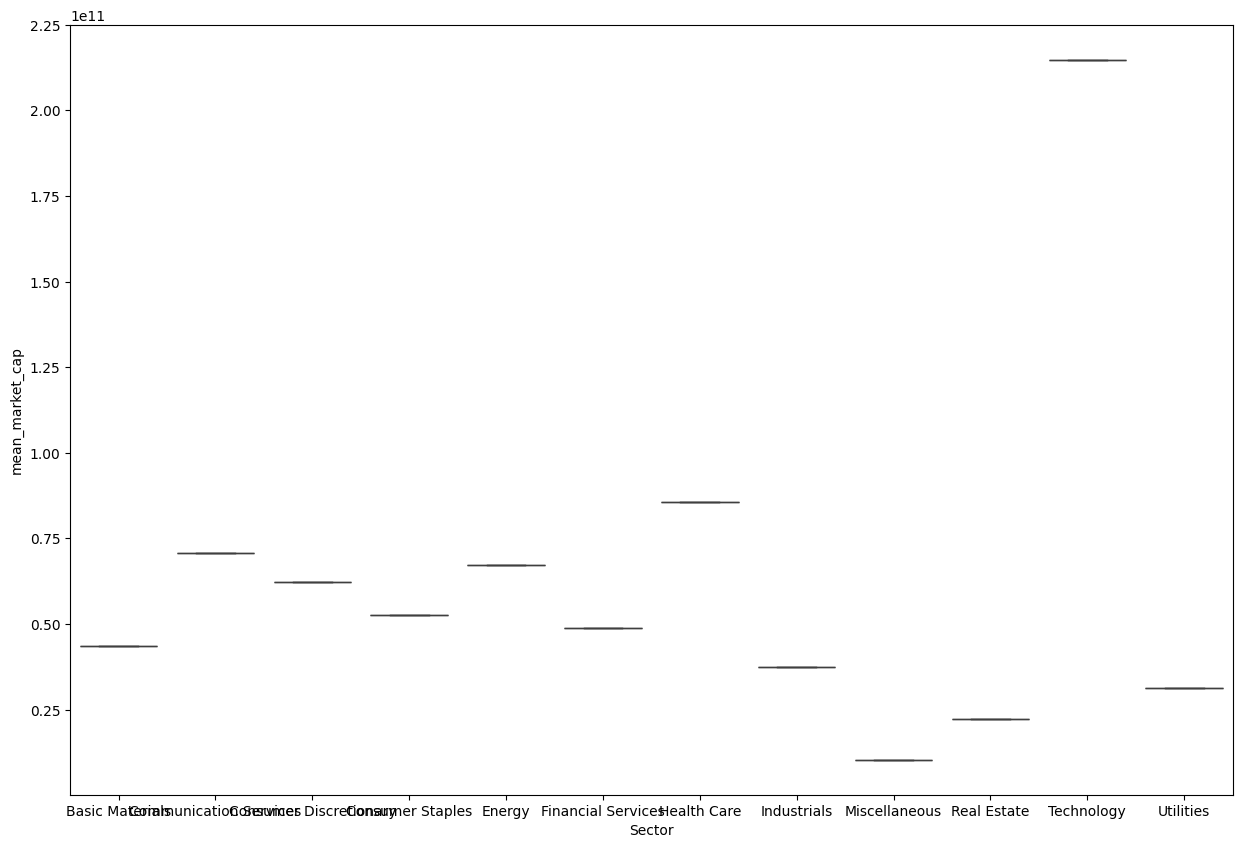

In [80]:
plt.figure(figsize = (15, 10 ))

sns.boxplot(aggregated_stats,
            x = "Sector",
            y = "mean_market_cap")

## Correlation Heatmap

This shows a correlation heatmap between variables in esg_ratings and stock history

In [140]:
HeatMap_Data = pd.concat([df4, df1], axis = 1)
HeatMap_Data

HeatMap_Data_numeric = HeatMap_Data.select_dtypes(include = "number")

<Axes: >

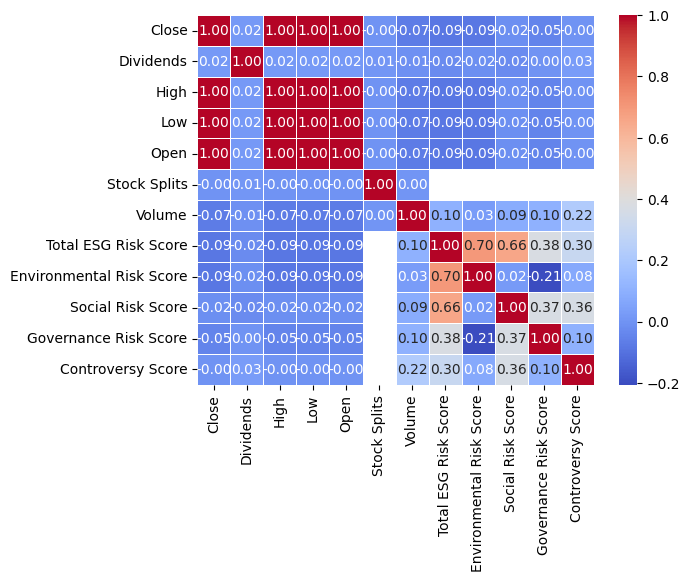

In [74]:
corr = HeatMap_Data_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Question 1: How Does Each Sector Perform By ESG Ratings?


<Axes: xlabel='Sector', ylabel='Total_ESG'>

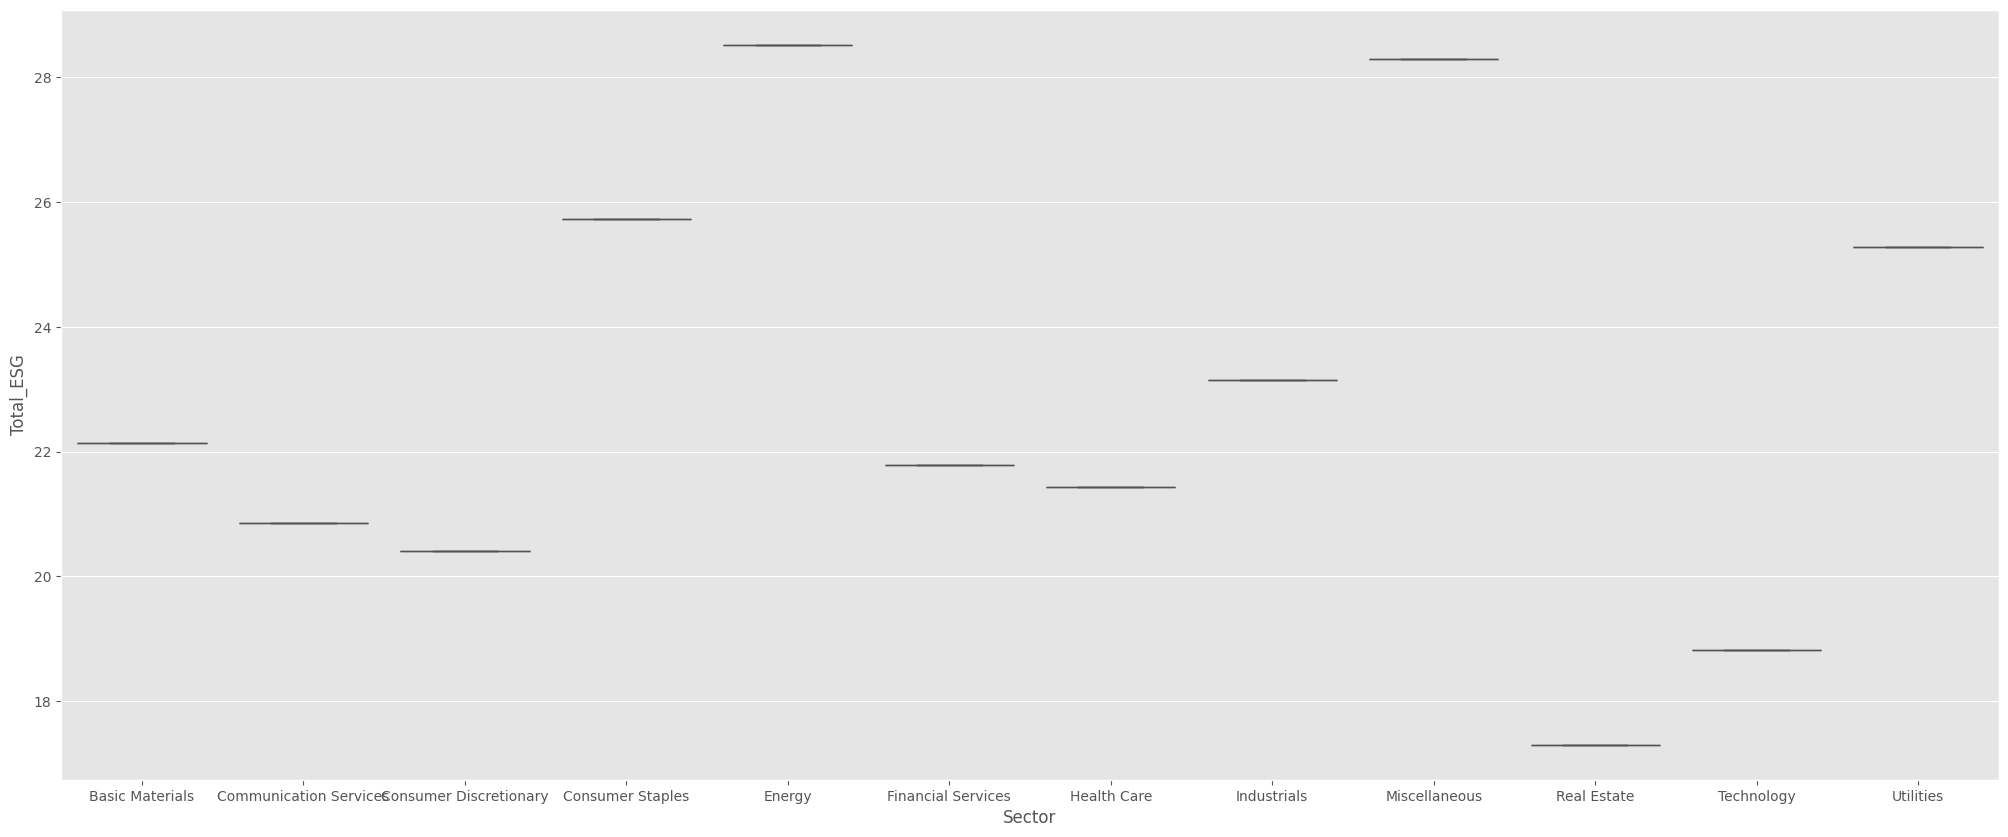

In [93]:
sectors_ESG = sectors.agg(
        Total_ESG = ("Total ESG Risk Score", "mean"),
        Social_ESG = ("Social Risk Score", "mean"),
        Environmental_ESG = ("Environmental Risk Score", "mean"),
        Governance_ESG = ("Governance Risk Score", "mean"),
        Controversy_ESG = ("Controversy Score", "mean")
)

plt.figure(figsize = (25, 10 ))
sns.boxplot(data = sectors_ESG,
            x = "Sector",
            y = "Total_ESG")



<Axes: xlabel='Sector', ylabel='Environmental_ESG'>

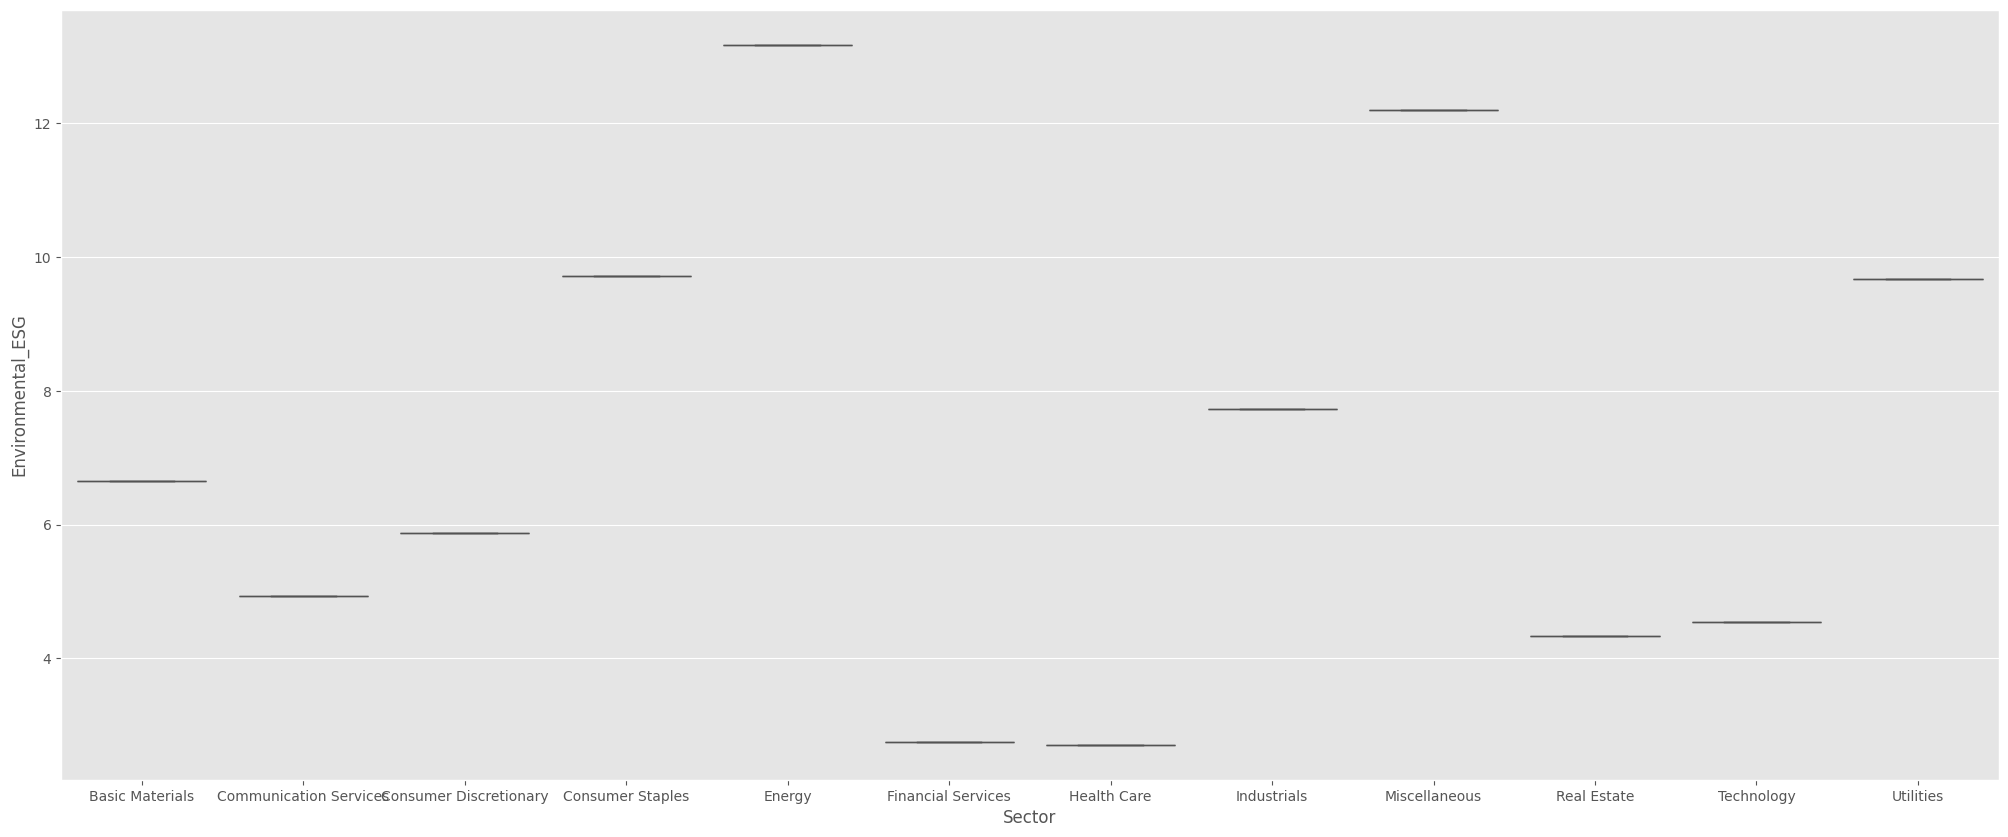

In [91]:

plt.style.available
plt.style.use('ggplot')
plt.figure(figsize = (25, 10 ))

sns.boxplot(data = sectors_ESG,
            x = "Sector",
            y = "Environmental_ESG")

When looking at the ESG environmental rating for each sector sectors like utilities energy rank higher than other sectors since their work is directly involved in natural resources and emissions. Sectors like financial services and real estate rank lower since they are not directly involved in environmental issues.

<Axes: xlabel='Sector', ylabel='Social_ESG'>

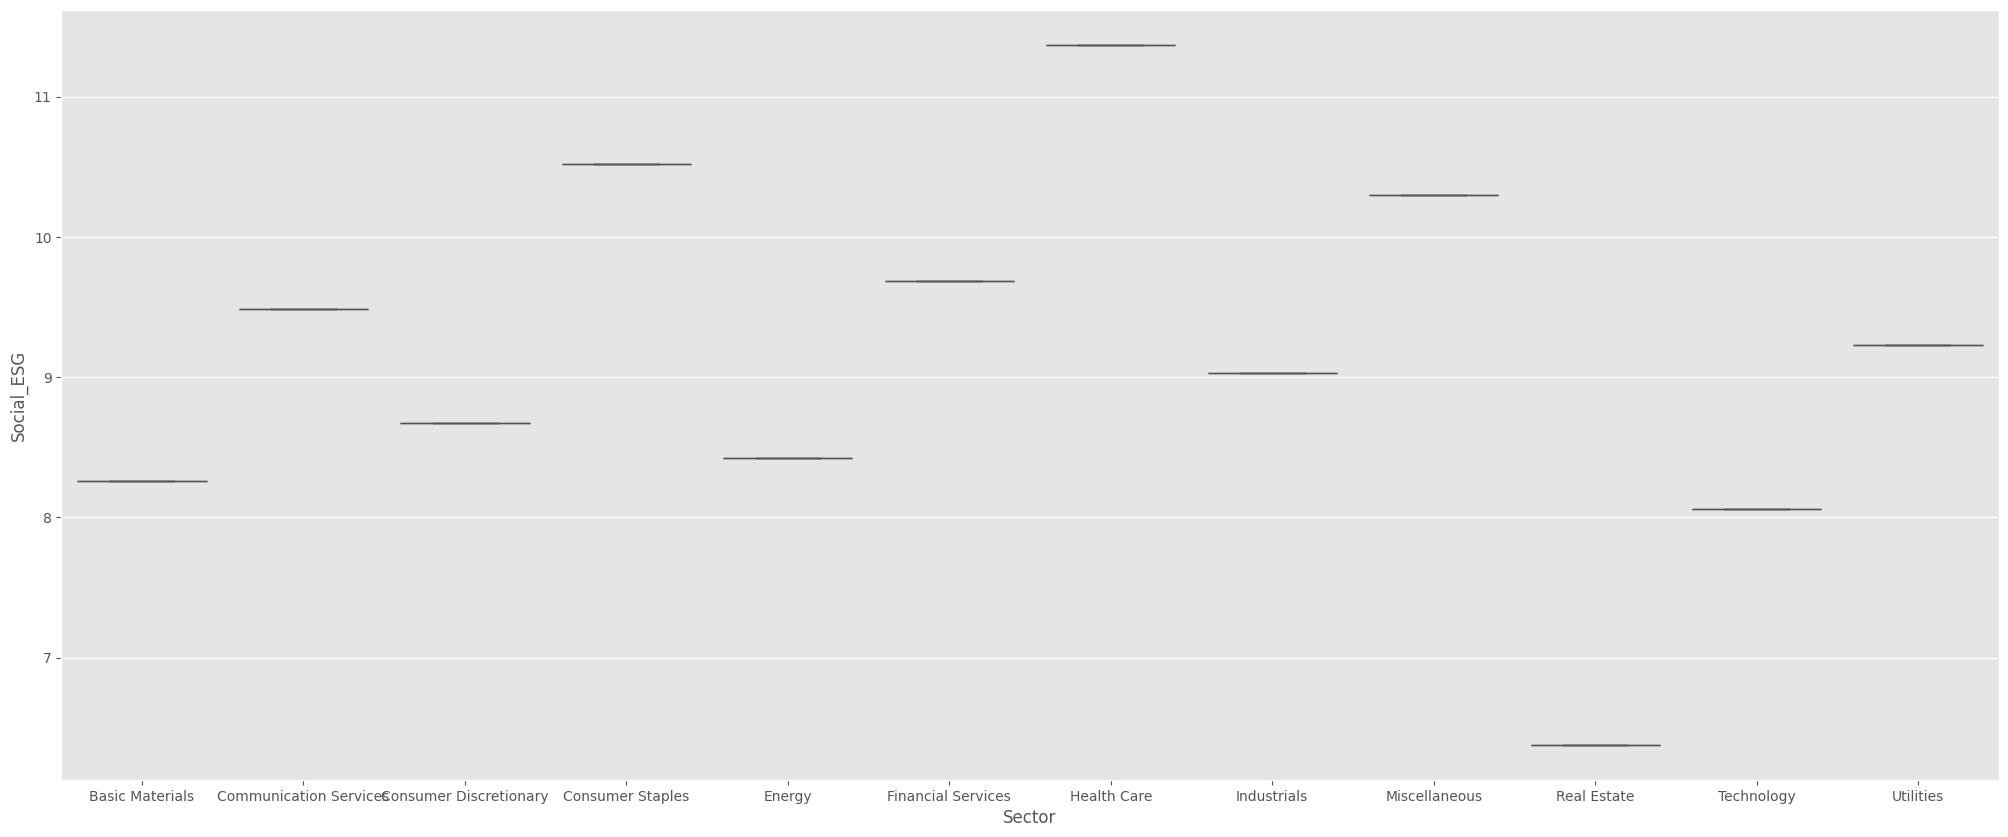

In [92]:
plt.style.available
plt.style.use('ggplot')
plt.figure(figsize = (25, 10 ))

sns.boxplot(data = sectors_ESG,
            x = "Sector",
            y = "Social_ESG")

Financial services has a notable increase from environmental ESG to social ESG. This may be because financial services is a sector that has more social implications.

<Axes: xlabel='Sector', ylabel='Governance_ESG'>

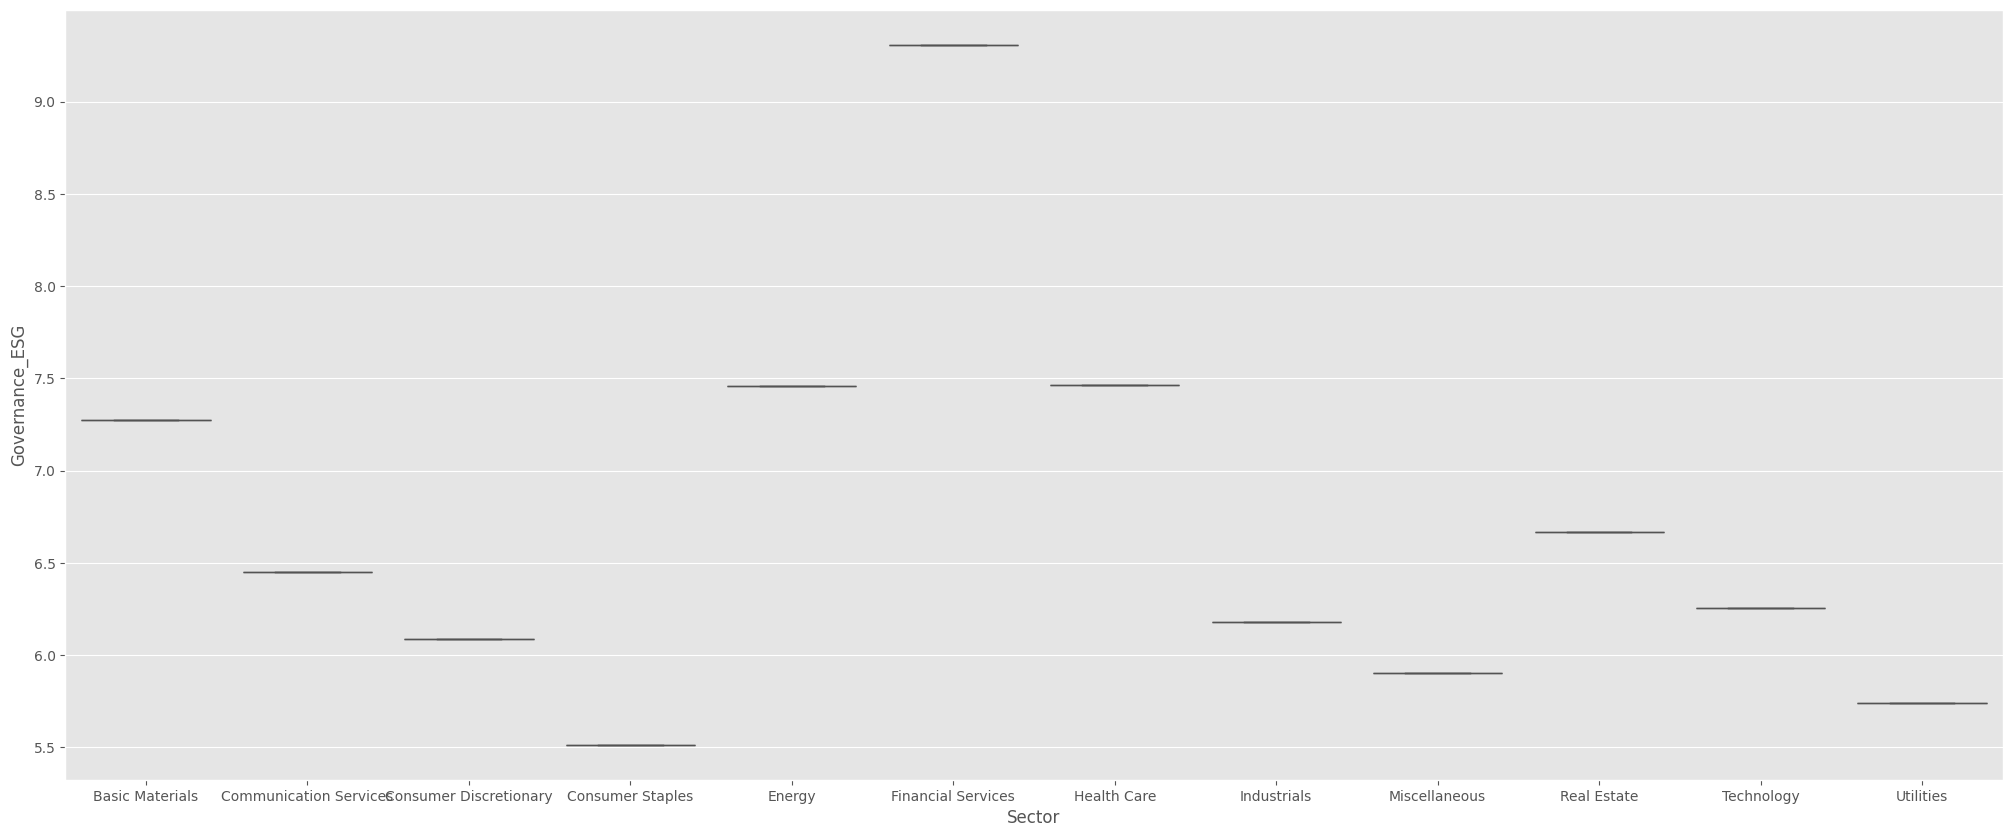

In [95]:
plt.style.available
plt.style.use('ggplot')
plt.figure(figsize = (25, 10 ))

sns.boxplot(data = sectors_ESG,
            x = "Sector",
            y = "Governance_ESG")

<Axes: xlabel='Sector', ylabel='Controversy_ESG'>

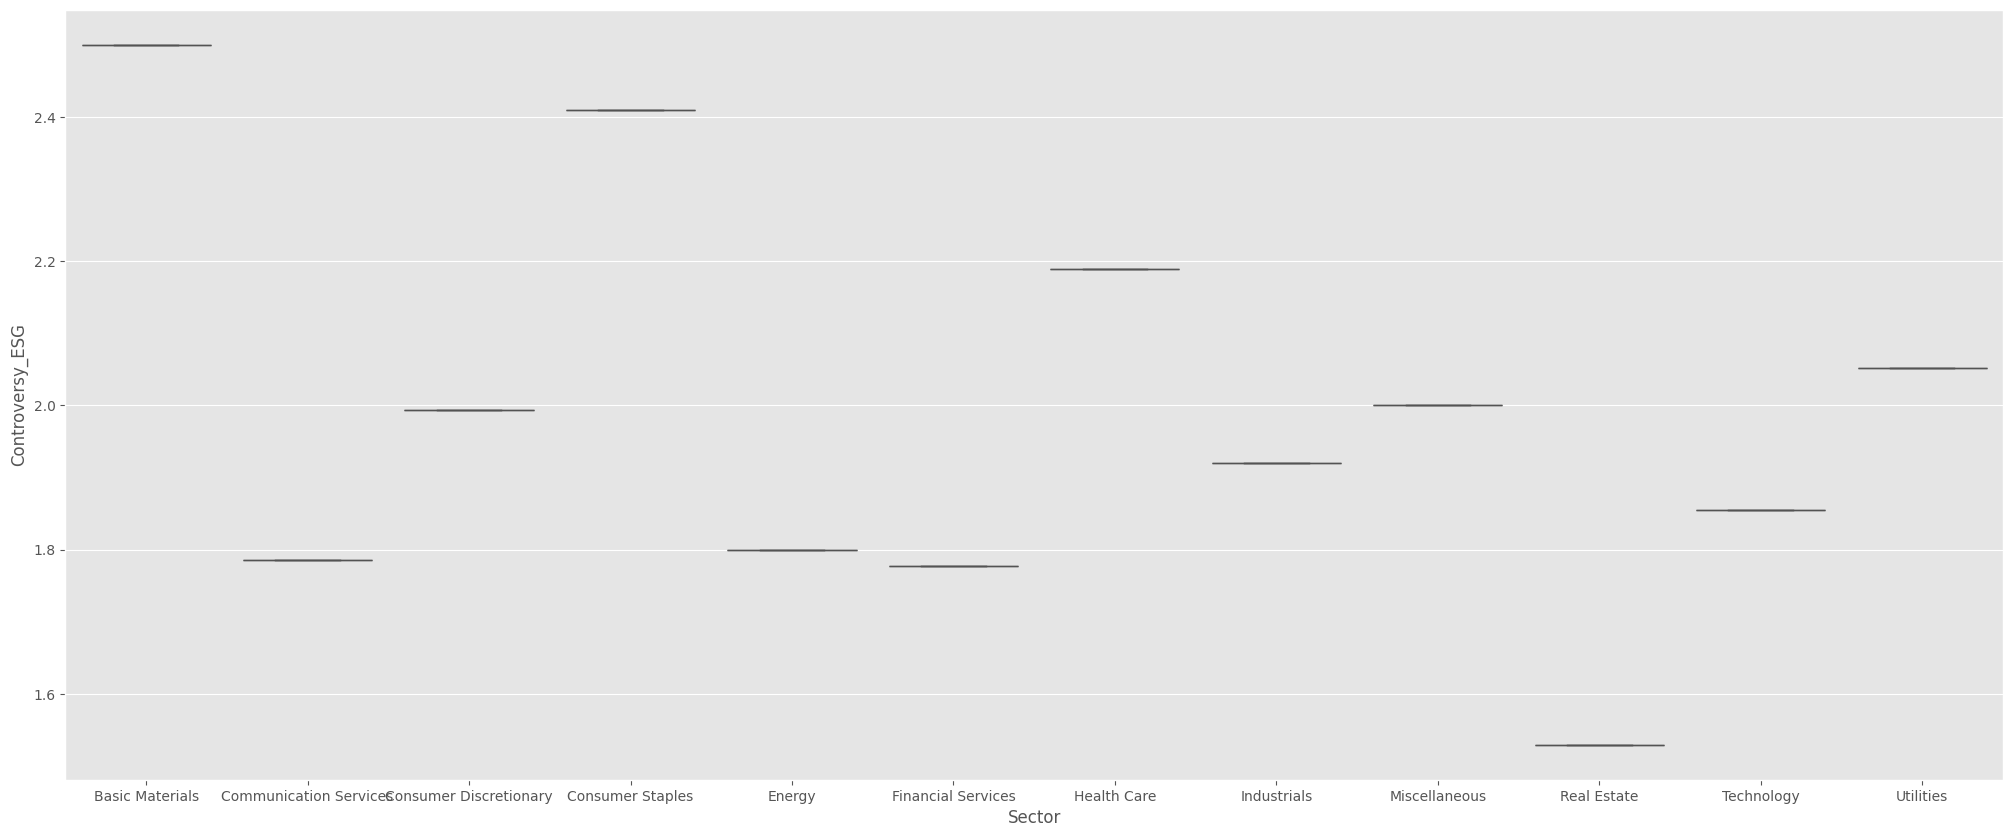

In [99]:
plt.style.available
plt.style.use('ggplot')
plt.figure(figsize = (25, 10 ))

sns.boxplot(data = sectors_ESG,
            x = "Sector",
            y = "Controversy_ESG")

Basic materials, Consumer staples, and Health care have the three highest levels of controversy. These three sectors play a role in most peoples day to day life but still may have practices that dont allign with peoples values.

From these boxplots we see that the sector can be an indicator for which ESG rating a firm performs well or poorly in.

# Question 2: Is there a relationship between stock performance, earnings and ESG ratings?

<Axes: >

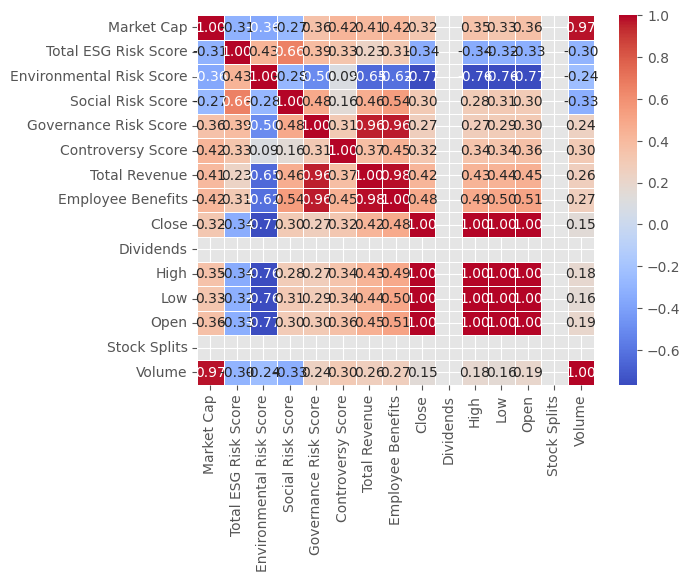

In [168]:
Q2_Data = pd.concat([esg_proj, df1, df2, df3, df4], axis = 1)
Q2_Data[636:701]
columns_list = Q2_Data.columns.tolist()
variables = columns_list[0:11]
variables2 = ["Total Revenue", "Employee Benefits" ]
variables3 = columns_list[-8 : ]

columns = variables + variables2 + variables3

Q2_Data_Select = Q2_Data[columns]
Q2_Data_Select

Q2_Data_numeric = Q2_Data_Select.select_dtypes(include = "number")
cor = Q2_Data_numeric[1:8].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)



This heatmap shows some correlations between the esg ratings, income and balance statements, and stock performance. Notably, environmental risk score is positivly correlated with employee benefits. Employee benefits is also highly positvly correlted with governance risk score. Firms that have worse governemnt and environmental ESG ratings have better employee benefits. Total revnue is highly correlated with employee pay and governance risk score. It is slightly correlated with environmental risk score.

### Creating stock volatility variable

<Axes: >

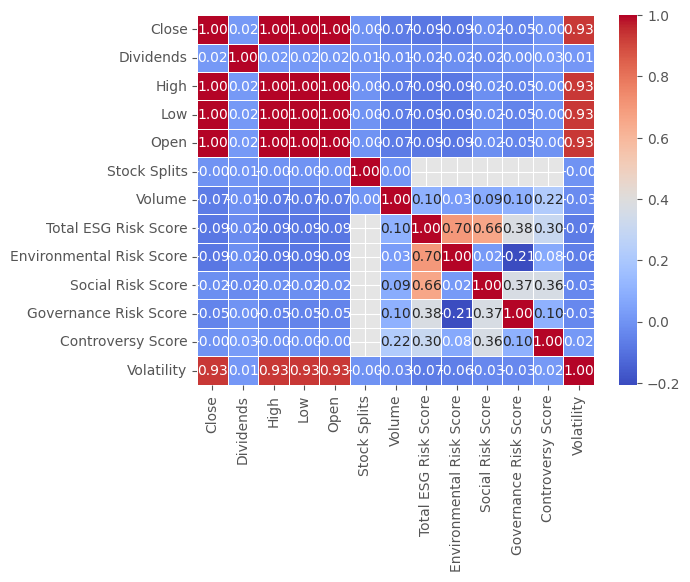

In [160]:
volatility = HeatMap_Data.groupby("Ticker")
HeatMap_Data["Volatility"] = volatility["Close"].transform( "std")
q2 = HeatMap_Data.head(636)
q2

q2 = HeatMap_Data.select_dtypes(include = "number")
cor = q2.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


There does not appear to be any correlation between stock performance and ESG ratings.

# Conclusion

ESG ratings are an important metric for measuring firm performance. In this data analysis we see that depending on a firms sector and their actions can determine their ESG scores. Further we see that companies that have high governance and environmental ESG ratings also have higher employee pay and total revneue. This could be because firms that do not invest in maximizing ESG metrics have lower costs. It is also possible that these are larger companies with greater social impacts so they have higher ESG scores. Large companies will also have higher revenues and pay their employees more.